Импортирую библиотеки, загружаю датафрейм с данными цены, хешрейта и других фич за период с 03-01-2009 по 02-09-2023.

Обрабатываю данные




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns, math, os
from statsmodels. tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.preprocessing import StandardScaler

В этом анализе использовался логарифм цены и хешрейта биткоин. Поскольку связь сопутствующего движения не может быть установлена в нестабильной серии, исследую стационарность Цены и Хешрейта

In [27]:
# Обрабатываю данные
df = pd.read_csv('blockchain_dot_com_daily_data.csv')
#df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index('datetime', inplace=True)
#df2 = df.resample('M').mean()

# Данные имеют широкий диапазон значений применяю к ним логарифмирование и сдвиг по значению переменной и добавляю поля.
df['diff_usd'] = (df['market_price_usd'] / df['market_price_usd'].shift(1))
df['diff_hash'] = (df['hash_rate'] / df['hash_rate'].shift(1))

df['log_usd'] = np.log(df['market_price_usd'])#.diff()
df['log_hash'] = np.log(df['hash_rate'])#.diff()

# Данные хеш_рейта и цены биткоина доступны с 31.07.2015 по 02.09.2023, выбираю этот период.
df_log = df["2015-07-31":"2023-09-02"]
df1 = df_log[['diff_usd', 'diff_hash', 'log_usd', 'log_hash']]

df1['diff_log_usd'] = np.log(df['diff_usd'])#.diff()
df1['diff_log_hash'] = np.log(df['diff_hash'])#.diff()

df1.head(50)

/Users/max/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/max/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_5/jcypzwvd5fz1trv2_rv7m_7r0000gn/T/ipykernel_82210/3288554203.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diff_log_usd'] = np.log(df['diff_usd'])#.diff()
/Users/max/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_5/jcypzwvd5

,diff_usd,diff_hash,log_usd,log_hash,diff_log_usd,diff_log_hash
datetime,,,,,,
2015-07-31,0.993970,1.014599,5.664522,12.797267,-0.006049,0.014493
2015-08-01,0.985647,1.179856,5.650065,12.962659,-0.014457,0.165392
2015-08-02,0.988182,0.957317,5.638177,12.919039,-0.011888,-0.043621
2015-08-03,1.004663,0.936306,5.642829,12.853226,0.004652,-0.065813
2015-08-04,0.995961,0.979592,5.638782,12.832606,-0.004047,-0.020619
2015-08-05,1.013802,0.875000,5.652489,12.699075,0.013708,-0.133531
2015-08-06,0.985965,1.111111,5.638355,12.804435,-0.014135,0.105361
2015-08-07,0.986050,1.014286,5.624306,12.818620,-0.014048,0.014185
2015-08-08,1.008084,1.114549,5.632358,12.927070,0.008052,0.108450


<Axes: xlabel='datetime'>

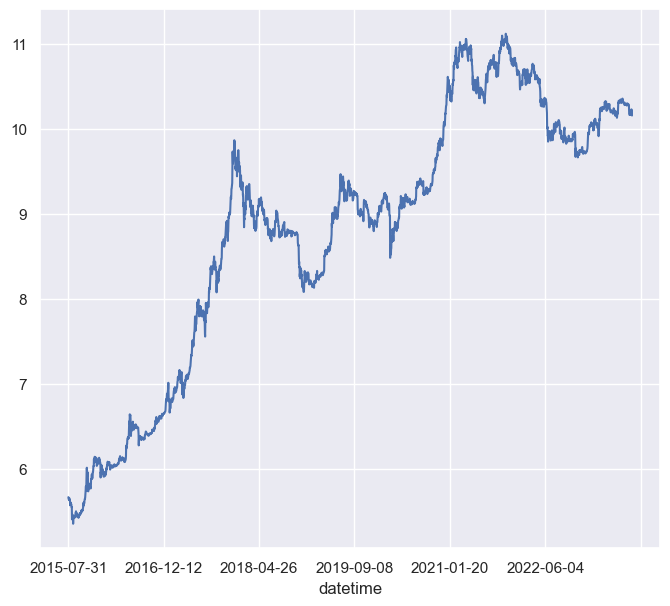

In [28]:
sns.set(rc={'figure.figsize':(8,7)})
df1['log_usd'].plot()

<Axes: xlabel='datetime'>

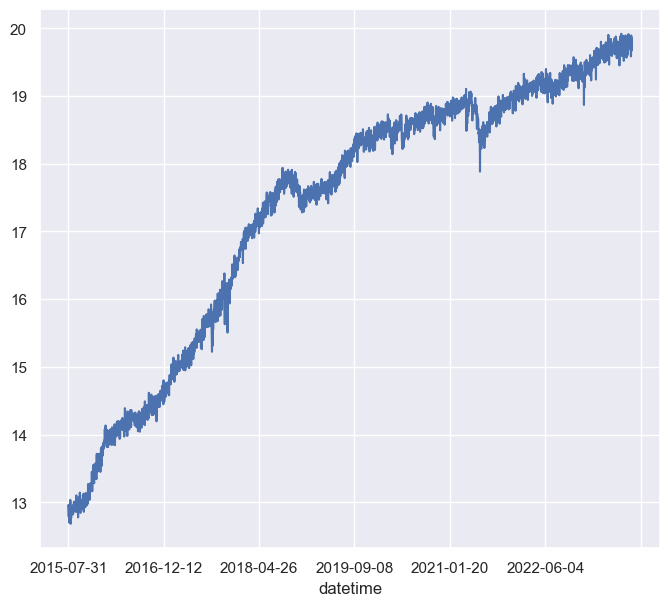

In [29]:
df1['log_hash'].plot()

<Axes: >

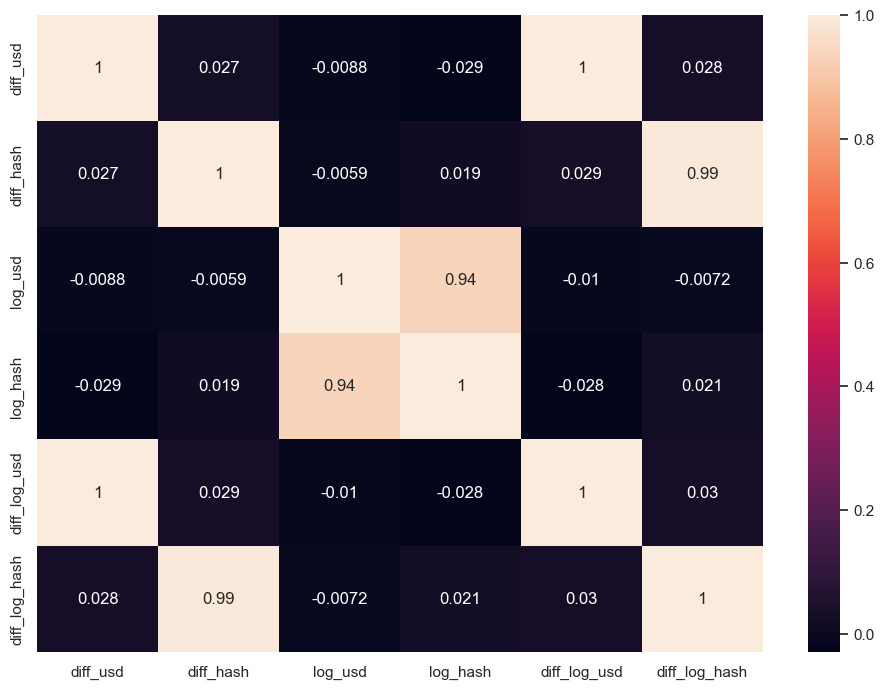

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df1.corr(), annot=True)

In [34]:
_log = df1['diff_log_usd'].tolist()
adfuller(_log )

(-37.99503361738398,
 0.0,
 1,
 2954,
 {'1%': -3.4325656369557747,
  '5%': -2.8625189227824275,
  '10%': -2.5672911072830114},
 -10763.017578856292)

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df1.drop('diff_log_usd', axis=1)
y = df1['diff_log_usd']

In [36]:
# from statsmodels.tsa.vector_ar import vecm

# pass "1min" frequency
# train_ecm.index = pd.DatetimeIndex(train_ecm.index).to_period('1mnt')
# model = vecm.select_order(train_ecm, maxlags=8)
# print(model.summary())
# model = vecm(df1, diff_lags=3, coint_rank=1)
# vecm_res = model.fit()

<Axes: xlabel='datetime'>

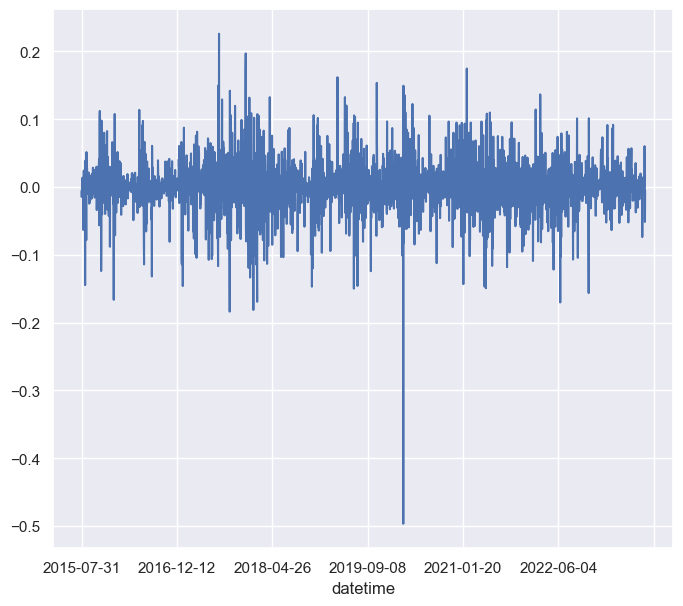

In [38]:
sns.set(rc={'figure.figsize':(8,7)})
df1['diff_log_usd'].plot()

<Axes: xlabel='datetime'>

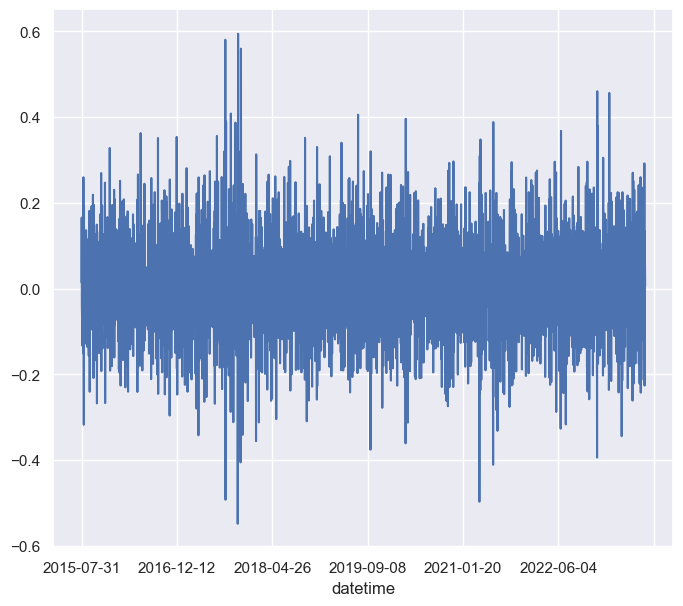

In [39]:
df1['diff_log_hash'].plot()

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate decision tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

# Train and evaluate random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Train and evaluate gradient boosting model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_y_pred = gb.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

# Print the evaluation metrics
print("Decision Tree:")
print("MSE: ", dt_mse)
print("R^2: ", dt_r2)
print("\nRandom Forest:")
print("MSE: ", rf_mse)
print("R^2: ", rf_r2)
print("\nGradient Boosting:")
print("MSE: ", gb_mse)
print("R^2: ", gb_r2)

Decision Tree:
MSE:  1.0940832641037137e-07
R^2:  0.999923633777925

Random Forest:
MSE:  1.9358089081956112e-07
R^2:  0.9998648819355637

Gradient Boosting:
MSE:  3.229908797196424e-07
R^2:  0.999774554697452


Сравниваю модели по значению средней квадратичной ошибке (MSE) и метрике R2.

Видно, что в случае простого дерева MSE имеет минимальный, а R2 – максимальный показатель.

То есть в модели простого дерева можно примерно объяснить 99.99% вариаций в ценах на биткоин.

Text(0, 0.5, 'Predicted')

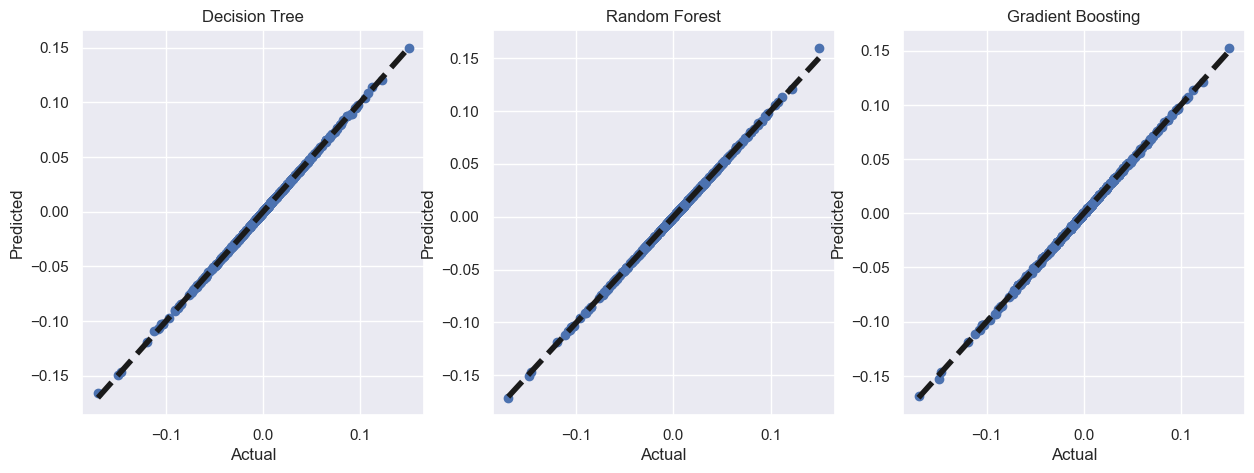

In [42]:
# Строю графики прогнозируемой и фактической модели
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(y_test, dt_y_pred)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
axs[0].set_title("Decision Tree")
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")
axs[1].scatter(y_test, rf_y_pred)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
axs[1].set_title("Random Forest")
axs[1].set_xlabel("Actual")
axs[1].set_ylabel("Predicted")
axs[2].scatter(y_test, gb_y_pred)
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
axs[2].set_title("Gradient Boosting")
axs[2].set_xlabel("Actual")
axs[2].set_ylabel("Predicted")